In [1]:
!pip install catboost
!pip install sweetviz
# !pip install --upgrade pandas
# !pip install --upgrade numpy

In [5]:
!pip install ppscore
!pip install pandas_datareader

In [7]:
import numpy as np
import pandas as pd
import ppscore as pps
import pickle
from IPython.display import clear_output
import sweetviz
import datetime
import pandas as pd
# from pandas_datareader import data
import warnings
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import csv
import re
from lightgbm import plot_importance,LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from math import sqrt
from catboost import CatBoostRegressor
from catboost import Pool, cv
import pickle
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [31]:
test = pd.read_csv("/content/drive/My Drive/E-Commerce Price Prediction/Test.csv")
train = pd.read_csv("/content/drive/My Drive/E-Commerce Price Prediction/Train.csv")

In [32]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [33]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


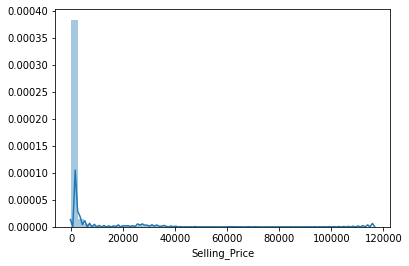

In [34]:
sns.distplot(train['Selling_Price'])

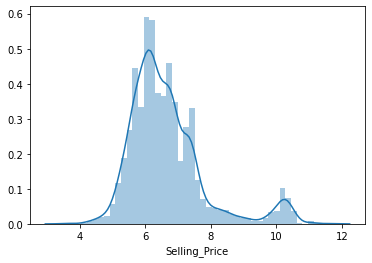

In [35]:
train['Selling_Price']=np.log1p(train['Selling_Price'])
sns.distplot(train['Selling_Price'])

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2452 non-null   object 
 1   Product_Brand  2452 non-null   object 
 2   Item_Category  2452 non-null   object 
 3   Subcategory_1  2452 non-null   object 
 4   Subcategory_2  2452 non-null   object 
 5   Item_Rating    2452 non-null   float64
 6   Date           2452 non-null   object 
 7   Selling_Price  2452 non-null   float64
dtypes: float64(2), object(6)
memory usage: 153.4+ KB


In [37]:
train.nunique()

Product          2452
Product_Brand    1010
Item_Category      75
Subcategory_1     130
Subcategory_2     336
Item_Rating        41
Date              483
Selling_Price    1095
dtype: int64

In [38]:
train.shape

(2452, 8)

In [39]:
train[(train['Product_Brand']=='B-3078')]['Item_Category'].nunique()

13

In [49]:
train['Unique_Item_category_per_product_brand']=train.groupby(['Product_Brand'])['Item_Category'].transform('nunique')
train['Unique_Subcategory_1_per_product_brand']=train.groupby(['Product_Brand'])['Subcategory_1'].transform('nunique')
train['Unique_Subcategory_2_per_product_brand']=train.groupby(['Product_Brand'])['Subcategory_2'].transform('nunique')

In [50]:
test['Unique_Item_category_per_product_brand']=test.groupby(['Product_Brand'])['Item_Category'].transform('nunique')
test['Unique_Subcategory_1_per_product_brand']=test.groupby(['Product_Brand'])['Subcategory_1'].transform('nunique')
test['Unique_Subcategory_2_per_product_brand']=test.groupby(['Product_Brand'])['Subcategory_2'].transform('nunique')

In [51]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,month,Day,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Unique_Item_category_per_product_brand,Unique_Subcategory_1_per_product_brand,Unique_Subcategory_2_per_product_brand
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,5.676754,2,3,34,5,1,False,False,1,1,1
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,6.800170,7,1,182,27,3,True,False,13,29,100
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,6.675823,1,12,12,2,1,False,False,1,1,1
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,6.731018,12,12,346,50,4,False,False,13,29,100
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,6.154858,12,12,346,50,4,False,False,13,29,100
